In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
applications_data = pd.read_csv('C:/Users/applications(2.0).csv')


In [3]:
applications_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13315 entries, 0 to 13314
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Applied at       13315 non-null  object 
 1   Amount           13272 non-null  float64
 2   Age              13315 non-null  int64  
 3   Gender           13315 non-null  object 
 4   Industry         13315 non-null  object 
 5   Marital status   13315 non-null  object 
 6   External Rating  13243 non-null  float64
 7   Education level  13282 non-null  object 
 8   Location         11540 non-null  object 
 9   applicant_id     13315 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.0+ MB


In [4]:
# Remove duplicates
applications_data.drop_duplicates(subset='applicant_id', keep='last', inplace=True)
print(applications_data)

                Applied at   Amount  Age   Gender  \
1      11.30.2022 10:26:39      NaN   36  Чоловік   
2      11.30.2022 10:26:58   7500.0   34  Чоловік   
3      11.30.2022 10:27:31   1500.0   23    Жінка   
4      11.30.2022 10:27:34   8400.0   33    Жінка   
5      11.30.2022 10:27:38  16500.0   31  Чоловік   
...                    ...      ...  ...      ...   
13310     01.09.2023 11:01  12000.0   25  Чоловік   
13311     01.09.2023 11:14  10500.0   28  Чоловік   
13312     01.09.2023 11:19   5790.0   25  Чоловік   
13313     01.09.2023 11:28  13500.0   31  Чоловік   
13314     01.09.2023 11:38  12600.0   32  Чоловік   

                           Industry Marital status  External Rating  \
1      Public services / Government         Single              3.0   
2              Adtech / Advertising         Single              4.0   
3                           Telecom         Single              0.0   
4                        Automotive         Single              6.0   
5       

In [5]:
# Replace empty values ​​in 'External Rating' with 0
applications_data['External Rating'].fillna(0, inplace = True)
print(applications_data)

                Applied at   Amount  Age   Gender  \
1      11.30.2022 10:26:39      NaN   36  Чоловік   
2      11.30.2022 10:26:58   7500.0   34  Чоловік   
3      11.30.2022 10:27:31   1500.0   23    Жінка   
4      11.30.2022 10:27:34   8400.0   33    Жінка   
5      11.30.2022 10:27:38  16500.0   31  Чоловік   
...                    ...      ...  ...      ...   
13310     01.09.2023 11:01  12000.0   25  Чоловік   
13311     01.09.2023 11:14  10500.0   28  Чоловік   
13312     01.09.2023 11:19   5790.0   25  Чоловік   
13313     01.09.2023 11:28  13500.0   31  Чоловік   
13314     01.09.2023 11:38  12600.0   32  Чоловік   

                           Industry Marital status  External Rating  \
1      Public services / Government         Single              3.0   
2              Adtech / Advertising         Single              4.0   
3                           Telecom         Single              0.0   
4                        Automotive         Single              6.0   
5       

In [6]:
# Check
applications_data.iloc[78]

Applied at                          11.30.2022 10:36:59
Amount                                          30000.0
Age                                                  29
Gender                                          Чоловік
Industry                                     Blockchain
Marital status                                   Single
External Rating                                     7.0
Education level    Вища (бакалавр, спеціаліст, магістр)
Location                                Київ чи область
applicant_id           d85404bd5576f05b711ad56cad428463
Name: 80, dtype: object

In [7]:
# В полі 'Education level' заповни відсутні значення текстом “Середня”
applications_data['Education level'].fillna('Середня', inplace = True)
print(applications_data)

                Applied at   Amount  Age   Gender  \
1      11.30.2022 10:26:39      NaN   36  Чоловік   
2      11.30.2022 10:26:58   7500.0   34  Чоловік   
3      11.30.2022 10:27:31   1500.0   23    Жінка   
4      11.30.2022 10:27:34   8400.0   33    Жінка   
5      11.30.2022 10:27:38  16500.0   31  Чоловік   
...                    ...      ...  ...      ...   
13310     01.09.2023 11:01  12000.0   25  Чоловік   
13311     01.09.2023 11:14  10500.0   28  Чоловік   
13312     01.09.2023 11:19   5790.0   25  Чоловік   
13313     01.09.2023 11:28  13500.0   31  Чоловік   
13314     01.09.2023 11:38  12600.0   32  Чоловік   

                           Industry Marital status  External Rating  \
1      Public services / Government         Single              3.0   
2              Adtech / Advertising         Single              4.0   
3                           Telecom         Single              0.0   
4                        Automotive         Single              6.0   
5       

In [8]:
# Check
applications_data.iloc[3236]

Applied at                         12.02.2022 17:06
Amount                                       2400.0
Age                                              23
Gender                                      Чоловік
Industry                                      AR/VR
Marital status                              Married
External Rating                                 1.0
Education level                             Середня
Location                            Київ чи область
applicant_id       a11cf64fccf393b2e85577c9735b352b
Name: 3246, dtype: object

In [9]:
# Adding the DataFrame data from the industries.csv file, namely the Industry rankings.
industries_data = pd.read_csv('C:/Users/industries(2.0).csv')

In [10]:
merged_data = pd.merge(applications_data, industries_data, on = 'Industry', how = 'left')
merged_data.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score
0,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20
1,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10
2,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15
3,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15
4,11.30.2022 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15


In [11]:
# Split object 'Applied at'. Separate Date and Time. Because the format has a different type of writing. 
# And that's why we can't do the conversion from the Object type to the Datetime type.
# We are reduced Date to one type of writing m:d:y
merged_data[['Date', 'Time']] = merged_data['Applied at'].str.split(' ', expand = True)
print(merged_data)

                Applied at   Amount  Age   Gender  \
0      11.30.2022 10:26:39      NaN   36  Чоловік   
1      11.30.2022 10:26:58   7500.0   34  Чоловік   
2      11.30.2022 10:27:31   1500.0   23    Жінка   
3      11.30.2022 10:27:34   8400.0   33    Жінка   
4      11.30.2022 10:27:38  16500.0   31  Чоловік   
...                    ...      ...  ...      ...   
13273     01.09.2023 11:01  12000.0   25  Чоловік   
13274     01.09.2023 11:14  10500.0   28  Чоловік   
13275     01.09.2023 11:19   5790.0   25  Чоловік   
13276     01.09.2023 11:28  13500.0   31  Чоловік   
13277     01.09.2023 11:38  12600.0   32  Чоловік   

                           Industry Marital status  External Rating  \
0      Public services / Government         Single              3.0   
1              Adtech / Advertising         Single              4.0   
2                           Telecom         Single              0.0   
3                        Automotive         Single              6.0   
4       

In [12]:
# Transform object 'Date' to Datatime
merged_data['Date'] = pd.to_datetime(merged_data['Date'], format='%m.%d.%Y')

In [13]:
# Creatin Rating
# Creating a new 'Rating' column with an initial value of 0
merged_data['Rating'] = 0
merged_data['Rating'] += ((merged_data['Age'] >= 35) & (merged_data['Age'] <= 55)) * 20
merged_data['Rating'] += (merged_data['Date'].dt.weekday < 5) * 20
merged_data['Rating'] += (merged_data['Marital status'] == 'Married') * 20
merged_data['Rating'] += merged_data['Location'].str.contains('Київ чи область', case=False, na=False) * 10
merged_data['Rating'] += merged_data['Score']
merged_data['Rating'] += (merged_data['External Rating'] >= 7) * 20
merged_data['Rating'] -= (merged_data['External Rating'] <= 2) * 20

In [14]:
# Conditions for zero-rating
merged_data.loc[(merged_data['Amount'].isna()) | (merged_data['External Rating'] == 0), 'Rating'] = 0

In [15]:
# Limit rating values ​​in the range from 0 to 100
merged_data['Rating'] = merged_data['Rating'].clip(0, 100)

In [16]:
# View the result
print(merged_data[['applicant_id', 'Rating']])

                           applicant_id  Rating
0      63dfcf8e6904186650d6814279fbe42f       0
1      10dbafaeb46c09e96b6987c03bbb3498      40
2      5847ac62cc9eac5e323c2517dcc91ad1       0
3      5d21f3795b50de8e8f8f8d5f48b754f3      35
4      f720bf9c5c4c3e10a8568c1699847696      65
...                                 ...     ...
13273  01908b949a6a1eb44d1ee013ec377f9d      35
13274  6599ba629cfcfe8ac42c7d31c13f62de      40
13275  e57f181bec5b11870a541c43d9b960f7      40
13276  a340c62a1226509949ef60df10a7d726      55
13277  a36a922c50b554cad6cd0eb98a5eaad8      75

[13278 rows x 2 columns]


In [17]:
# Filter applications with a rating greater than zero
rating_without_zero = merged_data[merged_data['Rating'] > 0].copy()

In [18]:
# Adding a column 'Week' for the week of application
rating_without_zero.loc[:, 'Week'] = rating_without_zero['Date'].dt.isocalendar().week

In [19]:
# Grouping by week and calculating the average rating
weekly_average_rating = rating_without_zero.groupby('Week')['Rating'].mean().reset_index()
print("Average rating by week:")
print(weekly_average_rating)

Average rating by week:
   Week     Rating
0     1  51.174699
1     2  51.875000
2    48  50.652504
3    49  49.454904
4    50  49.834884
5    51  46.959146
6    52  50.931303


In [20]:
# Checking errors
# Checking that all values ​​in 'Rating' are numeric
rating_without_zero['Rating'] = pd.to_numeric(rating_without_zero['Rating'], errors='coerce')

# Checking for NaN values ​​in 'Rating' and 'Week' columns
print("Checking for NaN values:")
print(rating_without_zero[['Rating', 'Week']].isna().sum())

# Remove rows with NaN values ​​in 'Rating' or 'Week'
rating_without_zero.dropna(subset=['Rating', 'Week'], inplace=True)

# Data validation after cleaning
print("Data after cleaning:")
print(rating_without_zero[['Rating', 'Week']].head())

Checking for NaN values:
Rating    0
Week      0
dtype: int64
Data after cleaning:
   Rating  Week
1      40    48
3      35    48
4      65    48
5      35    48
6      35    48


<Figure size 1000x600 with 0 Axes>

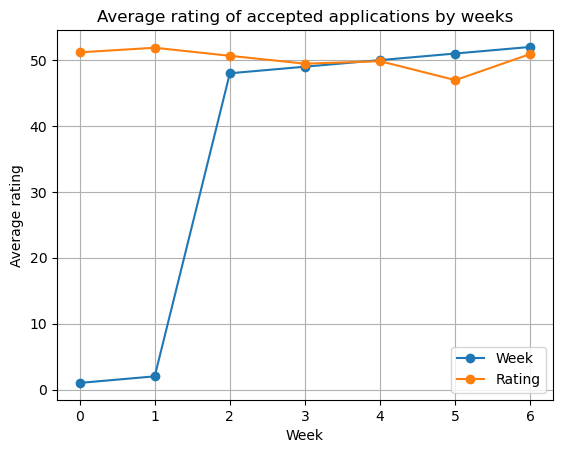

In [21]:
# Plotting graph
plt.figure(figsize=(10, 6))
weekly_average_rating.plot(kind='line', marker='o')
plt.title('Average rating of accepted applications by weeks')
plt.xlabel('Week')
plt.ylabel('Average rating')
plt.grid(True)
plt.show()
